In [1]:
import pandas as pd, numpy as np, os
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
output_dir ='/ihme/costeffectiveness/results/vivarium_ciff_sam/v5.3.0_maternal_supplementation/ciff_sam/2022_01_21_16_44_50/count_data/'

In [3]:
figname = 'model_5.3.0'

In [4]:
os.listdir(output_dir)

['wasting_transition_count.hdf',
 'wasting_transition_count.csv',
 'wasting_state_person_time.hdf',
 'deaths.csv',
 'wasting_state_person_time.csv',
 'deaths.hdf',
 'disease_transition_count.csv',
 'births.csv',
 'population.csv',
 'stunting_state_person_time.hdf',
 'ylds.csv',
 'ylls.csv',
 'disease_state_person_time.csv',
 'population.hdf',
 'ylls.hdf',
 'ylds.hdf',
 'disease_state_person_time.hdf',
 'births.hdf',
 'disease_transition_count.hdf',
 'stunting_state_person_time.csv']

# maternal bmi

In [7]:
births = pd.read_csv(output_dir +'births.csv')
birth_count = births.loc[births.measure=='total_births']
bw_sum = births.loc[births.measure=='birth_weight_sum']
lbw_sum = births.loc[births.measure=='low_weight_births']
birth_count.head()

,Unnamed: 0,sex,year,measure,input_draw,scenario,value,maternal_supplementation,maternal_malnutrition
768,768,female,2022,total_births,29,baseline,0.0,bep,cat2
769,769,female,2022,total_births,29,baseline,0.0,mmn,cat2
770,770,female,2022,total_births,29,baseline,4914.0,ifa,cat2
771,771,female,2022,total_births,29,baseline,3369.0,uncovered,cat2
772,772,female,2022,total_births,29,baseline,0.0,bep,cat1


## check exposure

proportion of babies born to each maternal BMI category
- validation target is 0.224 (95% CI: 0.217, 0.231) for cat1

In [9]:
cols = ['input_draw','scenario','maternal_malnutrition']
((birth_count.groupby(cols).sum()
 / birth_count.groupby([c for c in cols if c != 'maternal_malnutrition']).sum())
 .groupby([c for c in cols if c != 'input_draw'])
 .describe(percentiles=[0.025,0.975]))['value']

count      mean       std  \
scenario            maternal_malnutrition                              
baseline            cat1                    12.0  0.224619  0.004556   
                    cat2                    12.0  0.775381  0.004556   
lbwsg_interventions cat1                    12.0  0.224619  0.004556   
                    cat2                    12.0  0.775381  0.004556   
sqlns               cat1                    12.0  0.224619  0.004556   
                    cat2                    12.0  0.775381  0.004556   
wasting_treatment   cat1                    12.0  0.224619  0.004556   
                    cat2                    12.0  0.775381  0.004556   

                                                min      2.5%       50%  \
scenario            maternal_malnutrition                                 
baseline            cat1                   0.220045  0.220162  0.222632   
                    cat2                   0.766184  0.767552  0.777368   
lbwsg_interventions cat1                   0.220045  0.220162  0.222632   
                    cat2                   0.766184  0.767552  0.777368   
sqlns               cat1                   0.220045  0.220162  0.222632   
                    cat2                   0.766184  0.767552  0.777368   
wasting_treatment   cat1                   0.220045  0.220162  0.222632   
                    cat2                   0.766184  0.767552  0.777368   

                                              97.5%       max  
scenario            maternal_malnutrition                      
baseline            cat1                   0.232448  0.233816  
                    cat2                   0.779838  0.779955  
lbwsg_interventions cat1                   0.232448  0.233816  
                    cat2                   0.779838  0.779955  
sqlns               cat1                   0.232448  0.233816  
                    cat2                   0.779838  0.779955  
wasting_treatment   cat1                   0.232448  0.233816  
                    cat2                   0.779838  0.779955

In [10]:
# check it does not vary by sex
cols = ['input_draw','scenario','sex','maternal_malnutrition']
((birth_count.groupby(cols).sum()
 / birth_count.groupby([c for c in cols if c != 'maternal_malnutrition']).sum())
 .groupby([c for c in cols if c != 'input_draw'])
 .describe(percentiles=[0.025,0.975]))['value']

# looks good

count      mean       std  \
scenario            sex    maternal_malnutrition                              
baseline            female cat1                    12.0  0.224717  0.004443   
                           cat2                    12.0  0.775283  0.004443   
                    male   cat1                    12.0  0.224525  0.005111   
                           cat2                    12.0  0.775475  0.005111   
lbwsg_interventions female cat1                    12.0  0.224717  0.004443   
                           cat2                    12.0  0.775283  0.004443   
                    male   cat1                    12.0  0.224525  0.005111   
                           cat2                    12.0  0.775475  0.005111   
sqlns               female cat1                    12.0  0.224717  0.004443   
                           cat2                    12.0  0.775283  0.004443   
                    male   cat1                    12.0  0.224525  0.005111   
                           cat2                    12.0  0.775475  0.005111   
wasting_treatment   female cat1                    12.0  0.224717  0.004443   
                           cat2                    12.0  0.775283  0.004443   
                    male   cat1                    12.0  0.224525  0.005111   
                           cat2                    12.0  0.775475  0.005111   

                                                       min      2.5%  \
scenario            sex    maternal_malnutrition                       
baseline            female cat1                   0.217965  0.218469   
                           cat2                   0.768869  0.769273   
                    male   cat1                   0.218893  0.218991   
                           cat2                   0.763631  0.765914   
lbwsg_interventions female cat1                   0.217965  0.218469   
                           cat2                   0.768869  0.769273   
                    male   cat1                   0.218893  0.218991   
                           cat2                   0.763631  0.765914   
sqlns               female cat1                   0.217965  0.218469   
                           cat2                   0.768869  0.769273   
                    male   cat1                   0.218893  0.218991   
                           cat2                   0.763631  0.765914   
wasting_treatment   female cat1                   0.217965  0.218469   
                           cat2                   0.768869  0.769273   
                    male   cat1                   0.218893  0.218991   
                           cat2                   0.763631  0.765914   

                                                       50%     97.5%       max  
scenario            sex    maternal_malnutrition                                
baseline            female cat1                   0.223999  0.230727  0.231131  
                           cat2                   0.776001  0.781531  0.782035  
                    male   cat1                   0.223127  0.234086  0.236369  
                           cat2                   0.776873  0.781009  0.781107  
lbwsg_interventions female cat1                   0.223999  0.230727  0.231131  
                           cat2                   0.776001  0.781531  0.782035  
                    male   cat1                   0.223127  0.234086  0.236369  
                           cat2                   0.776873  0.781009  0.781107  
sqlns               female cat1                   0.223999  0.230727  0.231131  
                           cat2                   0.776001  0.781531  0.782035  
                    male   cat1                   0.223127  0.234086  0.236369  
                           cat2                   0.776873  0.781009  0.781107  
wasting_treatment   female cat1                   0.223999  0.230727  0.231131  
                           cat2                   0.776001  0.781531  0.782035  
                    male   cat1   

In [11]:
# check it does not vary by year
cols = ['input_draw','scenario','year','maternal_malnutrition']
((birth_count.groupby(cols).sum()
 / birth_count.groupby([c for c in cols if c != 'maternal_malnutrition']).sum())
 .groupby([c for c in cols if c != 'input_draw'])
 .describe(percentiles=[0.025,0.975]))['value'].head(12)

# looks good

count      mean       std  \
scenario            year maternal_malnutrition                              
baseline            2022 cat1                    12.0  0.224687  0.005866   
                         cat2                    12.0  0.775313  0.005866   
                    2023 cat1                    12.0  0.224510  0.005588   
                         cat2                    12.0  0.775490  0.005588   
                    2024 cat1                    12.0  0.225181  0.005346   
                         cat2                    12.0  0.774819  0.005346   
                    2025 cat1                    12.0  0.224626  0.005162   
                         cat2                    12.0  0.775374  0.005162   
                    2026 cat1                    12.0  0.224076  0.005594   
                         cat2                    12.0  0.775924  0.005594   
lbwsg_interventions 2022 cat1                    12.0  0.224687  0.005866   
                         cat2                    12.0  0.775313  0.005866   

                                                     min      2.5%       50%  \
scenario            year maternal_malnutrition                                 
baseline            2022 cat1                   0.215584  0.216667  0.223695   
                         cat2                   0.762175  0.764437  0.776305   
                    2023 cat1                   0.216446  0.216918  0.224127   
                         cat2                   0.762897  0.764942  0.775873   
                    2024 cat1                   0.213901  0.215733  0.224816   
                         cat2                   0.766693  0.766927  0.775184   
                    2025 cat1                   0.216639  0.217128  0.223455   
                         cat2                   0.764162  0.766047  0.776545   
                    2026 cat1                   0.215417  0.215559  0.224945   
                         cat2                   0.767956  0.768577  0.775055   
lbwsg_interventions 2022 cat1                   0.215584  0.216667  0.223695   
                         cat2                   0.762175  0.764437  0.776305   

                                                   97.5%       max  
scenario            year maternal_malnutrition                      
baseline            2022 cat1                   0.235563  0.237825  
                         cat2                   0.783333  0.784416  
                    2023 cat1                   0.235058  0.237103  
                         cat2                   0.783082  0.783554  
                    2024 cat1                   0.233073  0.233307  
                         cat2                   0.784267  0.786099  
                    2025 cat1                   0.233953  0.235838  
                         cat2                   0.782872  0.783361  
                    2026 cat1                   0.231423  0.232044  
                         cat2                   0.784441  0.784583  
lbwsg_interventions 2022 cat1                   0.235563  0.237825  
                         cat2                   0.783333  0.784416

## Birthweight difference by maternal bmi strata

validation target is -138.46 (95% CI: -174.68, -102.25) for cat1 relative to cat2

In [12]:
((bw_sum.groupby(['input_draw','scenario','maternal_malnutrition']).sum()
 / birth_count.groupby(['input_draw','scenario','maternal_malnutrition']).sum())
 .groupby(['scenario','maternal_malnutrition']).describe(percentiles=[0.025,0.975]))['value']

count         mean        std  \
scenario            maternal_malnutrition                                  
baseline            cat1                    12.0  3097.802694  30.428913   
                    cat2                    12.0  3232.427162  20.877924   
lbwsg_interventions cat1                    12.0  3156.501081  37.061286   
                    cat2                    12.0  3257.253106  22.171945   
sqlns               cat1                    12.0  3097.802694  30.428913   
                    cat2                    12.0  3232.427162  20.877924   
wasting_treatment   cat1                    12.0  3097.802694  30.428913   
                    cat2                    12.0  3232.427162  20.877924   

                                                   min         2.5%  \
scenario            maternal_malnutrition                             
baseline            cat1                   3044.059468  3047.682670   
                    cat2                   3190.685690  3197.949348   
lbwsg_interventions cat1                   3076.027393  3090.508977   
                    cat2                   3209.506598  3218.843633   
sqlns               cat1                   3044.059468  3047.682670   
                    cat2                   3190.685690  3197.949348   
wasting_treatment   cat1                   3044.059468  3047.682670   
                    cat2                   3190.685690  3197.949348   

                                                   50%        97.5%  \
scenario            maternal_malnutrition                             
baseline            cat1                   3100.154047  3147.722925   
                    cat2                   3233.455141  3268.641582   
lbwsg_interventions cat1                   3151.058758  3204.108435   
                    cat2                   3257.564749  3294.517011   
sqlns               cat1                   3100.154047  3147.722925   
                    cat2                   3233.455141  3268.641582   
wasting_treatment   cat1                   3100.154047  3147.722925   
                    cat2                   3233.455141  3268.641582   

                                                   max  
scenario            maternal_malnutrition               
baseline            cat1                   3154.119656  
                    cat2                   3274.464044  
lbwsg_interventions cat1                   3208.072853  
                    cat2                   3298.282778  
sqlns               cat1                   3154.119656  
                    cat2                   3274.464044  
wasting_treatment   cat1                   3154.119656  
                    cat2                   3274.464044

In [14]:
data = (bw_sum.groupby(['input_draw','scenario','maternal_malnutrition']).sum()
 / birth_count.groupby(['input_draw','scenario','maternal_malnutrition']).sum())[['value']].reset_index()
diff = (data.loc[data.maternal_malnutrition=='cat1'].drop(columns='maternal_malnutrition').set_index(['input_draw','scenario']) 
        - data.loc[data.maternal_malnutrition=='cat2'].drop(columns='maternal_malnutrition').set_index(['input_draw','scenario']))
diff = diff.groupby(['scenario']).describe(percentiles=[0.025,0.975])
diff
# looks good!

value                                                 \
                    count        mean        std         min        2.5%   
scenario                                                                   
baseline             12.0 -134.624468  19.297312 -175.533574 -168.395031   
lbwsg_interventions  12.0 -100.752025  28.194305 -167.432058 -154.134400   
sqlns                12.0 -134.624468  19.297312 -175.533574 -168.395031   
wasting_treatment    12.0 -134.624468  19.297312 -175.533574 -168.395031   

                                                         
                            50%       97.5%         max  
scenario                                                 
baseline            -136.321829 -104.324142 -101.936691  
lbwsg_interventions  -99.757760  -65.407500  -63.424730  
sqlns               -136.321829 -104.324142 -101.936691  
wasting_treatment   -136.321829 -104.324142 -101.936691

## Check proportion low birth weight

This does not have a specific verification target, but is good to check and can be compared to other external literature sources for validation

In [15]:
((lbw_sum.groupby(['input_draw','scenario','maternal_malnutrition']).sum()
 / birth_count.groupby(['input_draw','scenario','maternal_malnutrition']).sum())
 .groupby(['scenario','maternal_malnutrition']).describe(percentiles=[0.025,0.975]))['value']

count      mean       std  \
scenario            maternal_malnutrition                              
baseline            cat1                    12.0  0.144177  0.009232   
                    cat2                    12.0  0.096805  0.003743   
lbwsg_interventions cat1                    12.0  0.125048  0.009446   
                    cat2                    12.0  0.094171  0.003748   
sqlns               cat1                    12.0  0.144177  0.009232   
                    cat2                    12.0  0.096805  0.003743   
wasting_treatment   cat1                    12.0  0.144177  0.009232   
                    cat2                    12.0  0.096805  0.003743   

                                                min      2.5%       50%  \
scenario            maternal_malnutrition                                 
baseline            cat1                   0.130165  0.130458  0.144387   
                    cat2                   0.090678  0.091209  0.097051   
lbwsg_interventions cat1                   0.113534  0.113840  0.124483   
                    cat2                   0.088579  0.088970  0.093350   
sqlns               cat1                   0.130165  0.130458  0.144387   
                    cat2                   0.090678  0.091209  0.097051   
wasting_treatment   cat1                   0.130165  0.130458  0.144387   
                    cat2                   0.090678  0.091209  0.097051   

                                              97.5%       max  
scenario            maternal_malnutrition                      
baseline            cat1                   0.160830  0.163370  
                    cat2                   0.101537  0.101691  
lbwsg_interventions cat1                   0.144439  0.149023  
                    cat2                   0.099061  0.099217  
sqlns               cat1                   0.160830  0.163370  
                    cat2                   0.101537  0.101691  
wasting_treatment   cat1                   0.160830  0.163370  
                    cat2                   0.101537  0.101691

In [16]:
data = (lbw_sum.groupby(['input_draw','scenario','maternal_malnutrition']).sum()
 / birth_count.groupby(['input_draw','scenario','maternal_malnutrition']).sum())[['value']].reset_index()
rr = (data.loc[data.maternal_malnutrition=='cat1'].drop(columns='maternal_malnutrition').set_index(['input_draw','scenario']) 
        / data.loc[data.maternal_malnutrition=='cat2'].drop(columns='maternal_malnutrition').set_index(['input_draw','scenario']))
rr = rr.groupby(['scenario']).describe(percentiles=[0.025,0.975])
rr

value                                                    \
                    count      mean       std       min      2.5%       50%   
scenario                                                                      
baseline             12.0  1.489648  0.081779  1.365626  1.374218  1.495288   
lbwsg_interventions  12.0  1.327923  0.085137  1.230966  1.234296  1.326329   
sqlns                12.0  1.489648  0.081779  1.365626  1.374218  1.495288   
wasting_treatment    12.0  1.489648  0.081779  1.365626  1.374218  1.495288   

                                         
                        97.5%       max  
scenario                                 
baseline             1.629406  1.661750  
lbwsg_interventions  1.502276  1.553643  
sqlns                1.629406  1.661750  
wasting_treatment    1.629406  1.661750

In [17]:
wasting_pt = pd.read_csv(output_dir +'births.csv')
wasting_pt

,Unnamed: 0,sex,year,measure,input_draw,scenario,value,maternal_supplementation,maternal_malnutrition
0,0,female,2022,birth_weight_sum,29,baseline,0.000000e+00,bep,cat2
1,1,female,2022,birth_weight_sum,29,baseline,0.000000e+00,mmn,cat2
2,2,female,2022,birth_weight_sum,29,baseline,1.649433e+07,ifa,cat2
3,3,female,2022,birth_weight_sum,29,baseline,1.102632e+07,uncovered,cat2
4,4,female,2022,birth_weight_sum,29,baseline,0.000000e+00,bep,cat1
...,...,...,...,...,...,...,...,...,...
11515,11515,male,2026,total_births,946,wasting_treatment,3.693000e+03,uncovered,cat2
11516,11516,male,2026,total_births,946,wasting_treatment,0.000000e+00,bep,cat1
11517,11517,male,2026,total_births,946,wasting_treatment,0.000000e+00,mmn,cat1
11518,11518,male,2026,total_births,946,wasting_treatment,1.451000e+03,ifa,cat1


In [18]:
cols = ['input_draw','scenario','sex','age']

wasting_pt = pd.read_csv(output_dir +'wasting_state_person_time.csv').groupby(cols).sum()[['value']]
stunting_pt = pd.read_csv(output_dir +'stunting_state_person_time.csv').groupby(cols).sum()[['value']]
disease_pt = pd.read_csv(output_dir +'disease_state_person_time.csv')
disease_pt['cause'] = disease_pt.cause.str.replace('susceptible_to_','')
disease_pt = disease_pt.groupby(cols+['cause']).sum()[['value']].reset_index()
disease_pt['value'] = disease_pt['value'].round(0)
stunting_pt['value'] = stunting_pt['value'].round(0)
wasting_pt['value'] = wasting_pt['value'].round(0)

assert np.all(disease_pt.loc[disease_pt.cause=='diarrheal_diseases'].drop(columns='cause').set_index(cols) 
        == disease_pt.loc[disease_pt.cause=='lower_respiratory_infections'].drop(columns='cause').set_index(cols))

assert np.all(disease_pt.loc[disease_pt.cause=='diarrheal_diseases'].drop(columns='cause').set_index(cols) 
        == disease_pt.loc[disease_pt.cause=='measles'].drop(columns='cause').set_index(cols))

assert np.all(disease_pt.loc[disease_pt.cause=='diarrheal_diseases'].drop(columns='cause').set_index(cols) 
        == wasting_pt)

assert np.all(disease_pt.loc[disease_pt.cause=='diarrheal_diseases'].drop(columns='cause').set_index(cols) 
        == stunting_pt)

# Wasting and stunting exposures

In [19]:
state_pt = pd.read_csv(output_dir +'wasting_state_person_time.csv')
state_pt.head()

,Unnamed: 0,sex,year,cause,measure,input_draw,scenario,value,x_factor,sq_lns,mam_treatment,sam_treatment,age
0,0,female,2022,mild_child_wasting,state_person_time,29,baseline,0.0,cat2,covered,covered,covered,early_neonatal
1,1,female,2022,mild_child_wasting,state_person_time,29,baseline,0.0,cat1,covered,covered,covered,early_neonatal
2,2,female,2022,mild_child_wasting,state_person_time,29,baseline,0.0,cat2,covered,uncovered,covered,early_neonatal
3,3,female,2022,mild_child_wasting,state_person_time,29,baseline,0.0,cat1,covered,uncovered,covered,early_neonatal
4,4,female,2022,mild_child_wasting,state_person_time,29,baseline,0.0,cat2,covered,covered,uncovered,early_neonatal


In [20]:
groupby_cols = ['input_draw','sex','age','cause']

def calculate_child_growth_exposure_prevalence(risk):
    state_pt = pd.read_csv(output_dir +f'{risk}_state_person_time.csv')
    state_pt = state_pt.loc[state_pt.scenario=='baseline']
    state_pt = state_pt.groupby(groupby_cols).sum()[['value']].reset_index()
    if risk=='wasting':
        state_pt_exposed = state_pt.loc[state_pt.cause.str.contains('acute_malnutrition')]
        state_pt_exposed['cause'] = 'wasted'
    else:
        state_pt_exposed = state_pt.loc[state_pt.cause.isin(['cat1','cat2'])]
        state_pt_exposed['cause'] = 'stunted'
    state_pt_with_exposed = (pd.concat([state_pt, 
                          state_pt_exposed.groupby(groupby_cols).sum().reset_index()],
                         ignore_index=True)
                .set_index(groupby_cols))
    prev = state_pt_with_exposed / state_pt.groupby([c for c in groupby_cols if c != 'cause']).sum()
    prev = prev.groupby([c for c in groupby_cols if c != 'input_draw']).describe(percentiles=[0.025,0.975]).sort_index()
    return prev

In [21]:
wasting_prev = calculate_child_growth_exposure_prevalence('wasting')
wasting_prev.head()

<ipython-input-20-4f0de826d651>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_pt_exposed['cause'] = 'wasted'


value                      \
                                               count      mean       std   
sex    age        cause                                                    
female 1-5_months mild_child_wasting            12.0  0.201794  0.002149   
                  moderate_acute_malnutrition   12.0  0.080248  0.001615   
                  severe_acute_malnutrition     12.0  0.022712  0.001647   
                  susceptible_to_child_wasting  12.0  0.695246  0.004306   
                  wasted                        12.0  0.102960  0.003069   

                                                                              \
                                                     min      2.5%       50%   
sex    age        cause                                                        
female 1-5_months mild_child_wasting            0.196676  0.197393  0.201997   
                  moderate_acute_malnutrition   0.076352  0.077125  0.080381   
                  severe_acute_malnutrition     0.019647  0.019760  0.022972   
                  susceptible_to_child_wasting  0.690799  0.690891  0.694674   
                  wasted                        0.096410  0.097226  0.103435   

                                                                    
                                                   97.5%       max  
sex    age        cause                                             
female 1-5_months mild_child_wasting            0.204063  0.204175  
                  moderate_acute_malnutrition   0.082529  0.082801  
                  severe_acute_malnutrition     0.024808  0.024847  
                  susceptible_to_child_wasting  0.704270  0.706914  
                  wasted                        0.107337  0.107649

In [22]:
stunting_prev = calculate_child_growth_exposure_prevalence('stunting')
stunting_prev.head()

<ipython-input-20-4f0de826d651>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_pt_exposed['cause'] = 'stunted'


value                                          \
                          count      mean       std       min      2.5%   
sex    age        cause                                                   
female 1-5_months cat1     12.0  0.040347  0.004339  0.031995  0.033309   
                  cat2     12.0  0.108154  0.002843  0.103482  0.103703   
                  cat3     12.0  0.204578  0.007772  0.190846  0.190981   
                  cat4     12.0  0.646922  0.007456  0.638159  0.638248   
                  stunted  12.0  0.148500  0.005891  0.138490  0.139451   

                                                         
                                50%     97.5%       max  
sex    age        cause                                  
female 1-5_months cat1     0.040088  0.047993  0.048505  
                  cat2     0.108677  0.112532  0.112794  
                  cat3     0.205194  0.214701  0.215369  
                  cat4     0.645958  0.660859  0.663721  
                  stunted  0.148950  0.158815  0.159437

In [23]:
# artifact
from vivarium import Artifact
art = Artifact('/ihme/costeffectiveness/artifacts/vivarium_ciff_sam/ethiopia.hdf',
               filter_terms=['year_start == 2020', f'age_end <= 5'])

In [24]:
def load_child_growth_artifact_prev(risk):
    data = art.load(f'risk_factor.child_{risk}.exposure').reset_index()
    data_exposed = data.loc[data.parameter.isin(['cat1','cat2'])]
    data_exposed['parameter'] = 'exposed'
    data_exposed = data_exposed.groupby([c for c in data_exposed.columns if c != 'value' and 'draw' not in c]).sum().reset_index()
    data = pd.concat([data,data_exposed], ignore_index=True)
    data = data.set_index([c for c in data.columns if 'draw' not in c])
    data = (data.apply(pd.DataFrame.describe, percentiles=[0.025, 0.975], axis=1)
            .filter(['mean', '2.5%', '97.5%']).reset_index())
    data['age'] = 0
    data['age'] = np.where(data['age_start'] == 0, 'early_neonatal', #1
                                            np.where(data['age_end'] == 0.5, '1-5_months', #3
                                                     np.where(data['age_start'] == 0.5, '6-11_months', #4
                                                              np.where(data['age_start'] == 1, '12_to_23_months',  #5
                                                                       np.where(data['age_start'] == 2, '2_to_4',       #6
                                                                       'late_neonatal'))))) #2
    data['age_group'] = np.where(data['age'] == 'early_neonatal', 1,
                                   np.where(data['age'] == 'late_neonatal', 2,
                                            np.where(data['age'] == '1-5_months', 3, 
                                                     np.where(data['age'] == '6-11_months', 4, 
                                                              np.where(data['age'] == '12_to_23_months', 5,
                                    6)))))
    data['sex'] = np.where(data['sex'] == 'Female', 'female', 'male')
    
    return data

In [25]:
wasting_art = load_child_growth_artifact_prev('wasting')
wasting_art.head()

<ipython-input-24-b4b3aa8f8aaa>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_exposed['parameter'] = 'exposed'


,sex,age_start,age_end,year_start,year_end,parameter,mean,2.5%,97.5%,age,age_group
0,female,0.000000,0.019178,2020,2021,cat1,0.023100,0.019989,0.026792,early_neonatal,1
1,female,0.000000,0.019178,2020,2021,cat2,0.080399,0.076361,0.084449,early_neonatal,1
2,female,0.000000,0.019178,2020,2021,cat3,0.200563,0.195923,0.205312,early_neonatal,1
3,female,0.000000,0.019178,2020,2021,cat4,0.695938,0.687181,0.704784,early_neonatal,1
4,female,0.019178,0.076712,2020,2021,cat1,0.023190,0.019931,0.027105,late_neonatal,2


In [26]:
stunting_art = load_child_growth_artifact_prev('stunting')
stunting_art.head()

<ipython-input-24-b4b3aa8f8aaa>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_exposed['parameter'] = 'exposed'


,sex,age_start,age_end,year_start,year_end,parameter,mean,2.5%,97.5%,age,age_group
0,female,0.000000,0.019178,2020,2021,cat1,0.0,0.0,0.0,early_neonatal,1
1,female,0.000000,0.019178,2020,2021,cat2,0.0,0.0,0.0,early_neonatal,1
2,female,0.000000,0.019178,2020,2021,cat3,0.0,0.0,0.0,early_neonatal,1
3,female,0.000000,0.019178,2020,2021,cat4,1.0,1.0,1.0,early_neonatal,1
4,female,0.019178,0.076712,2020,2021,cat1,0.0,0.0,0.0,late_neonatal,2


In [27]:
def plot_cgf_exposure(wasting_prev, wasting_art, sex, art_severity, sim_severity, title_severity):
    plt.figure(dpi=120)
    a = wasting_art.loc[wasting_art.sex==f'{sex}'].loc[wasting_art.parameter==f'{art_severity}'].reset_index()
    plt.plot(a['age'].values, a['mean'].values, marker='o', label='Artifact')
    plt.fill_between(a['age'], a['2.5%'], a['97.5%'], alpha=0.4)

    s = wasting_prev.reset_index()
    s['order'] = np.where(s.age=='early_neonatal', 0,
                         np.where(s.age=='late_neonatal', 1,
                                 np.where(s.age=='1-5_months',2,
                                         np.where(s.age=='6-11_months',3,
                                                 np.where(s.age=='12_to_23_months',4,5)))))
    s = s.sort_values(by='order')
    s = s.loc[s.sex==f'{sex}'].loc[s.cause==f'{sim_severity}']
    plt.plot(s['age'], s['value','mean'], marker='o', label=f'Simulation baseline')
    plt.fill_between(s['age'], s['value','2.5%'], s['value','97.5%'], alpha=0.2)
    
    plt.xticks(rotation=60)
    plt.title(f'{title_severity} exposure: {sex}s')
    plt.legend()
    plt.ylabel('Proportion')
    plt.ylim(0,max(a['97.5%'])*1.25)
    plt.grid()

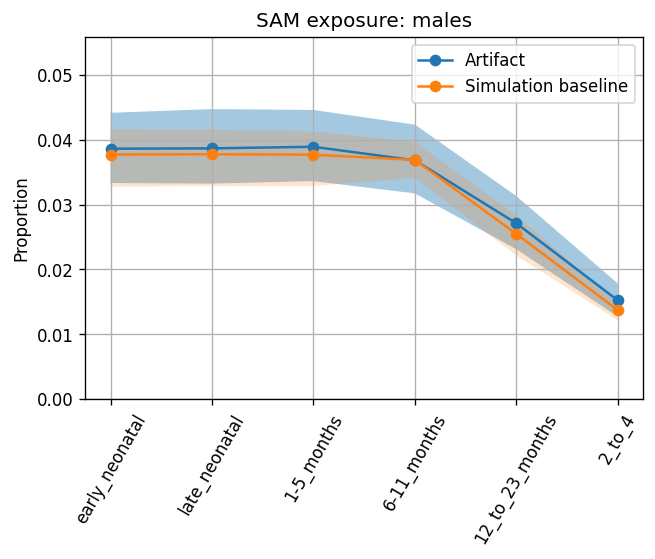

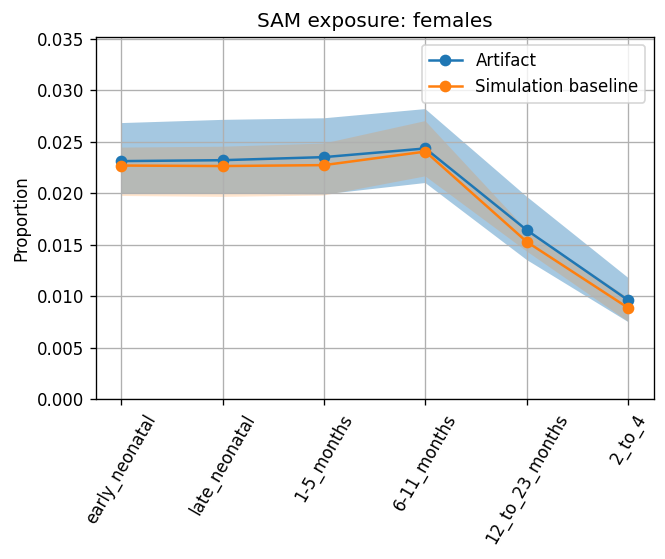

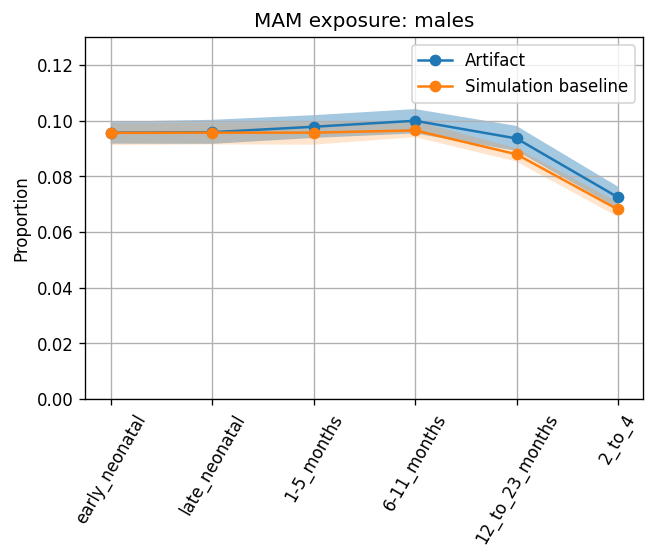

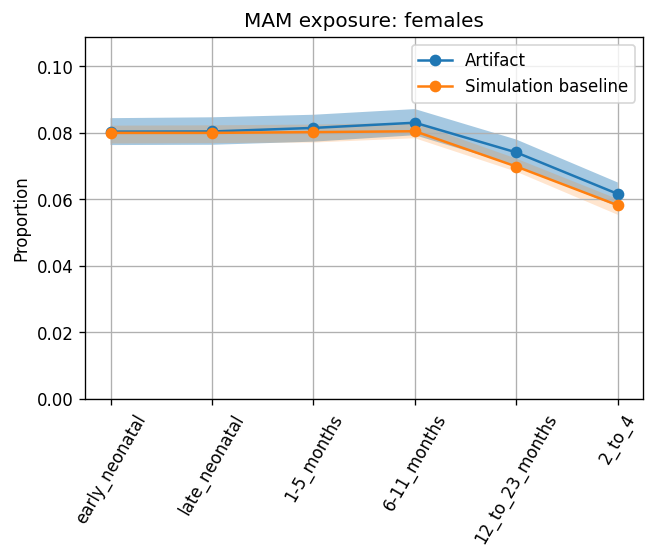

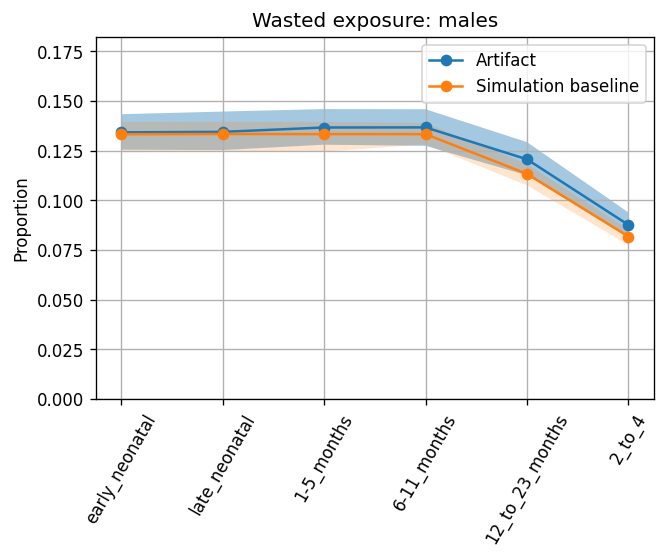

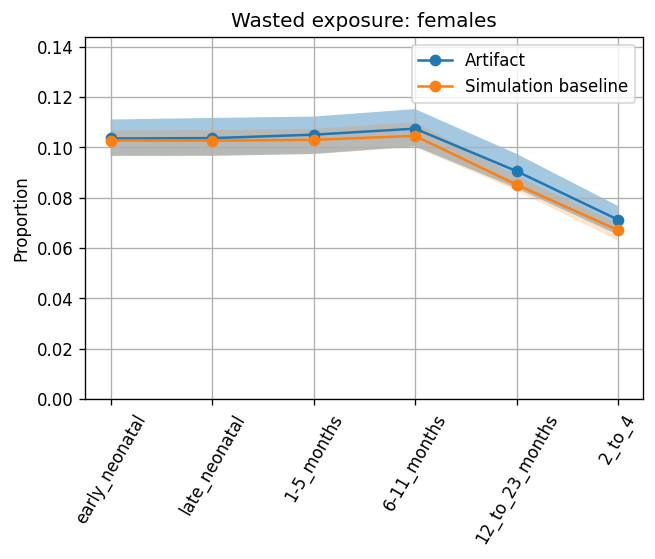

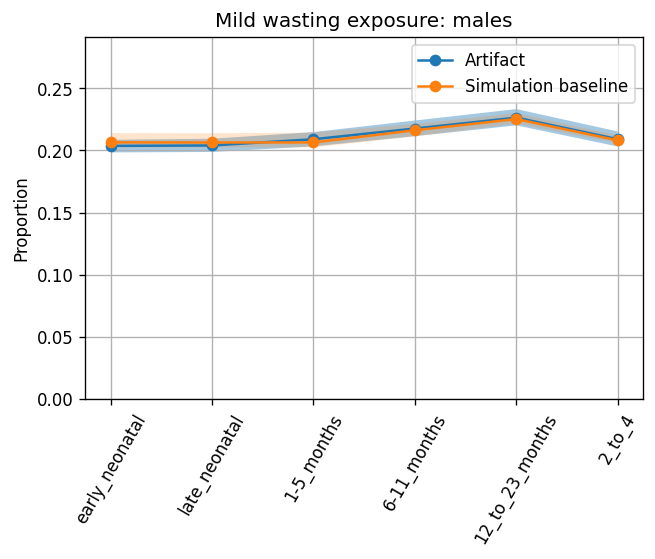

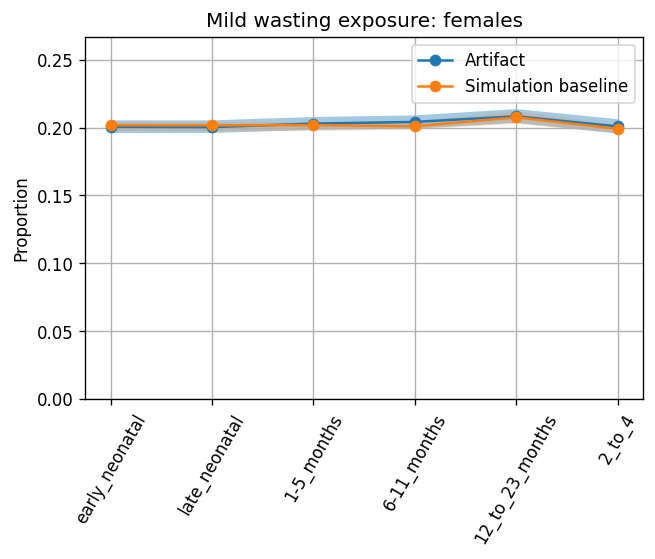

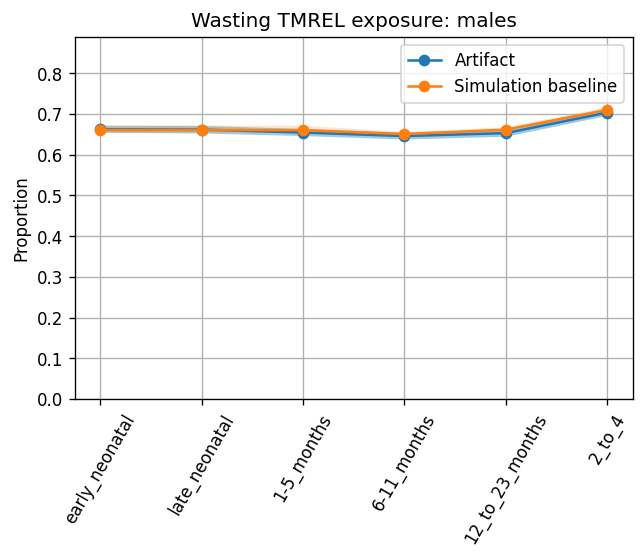

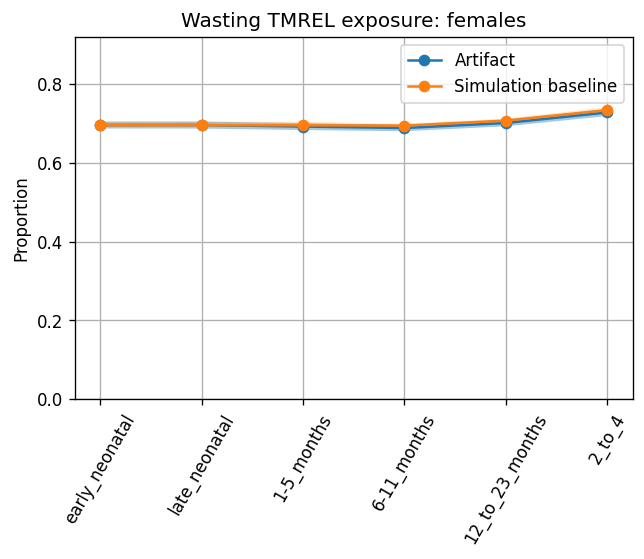

In [28]:
w_sim_cats = ['severe_acute_malnutrition','moderate_acute_malnutrition','wasted',
              'mild_child_wasting','susceptible_to_child_wasting']
s_sim_cats = ['cat1','cat2','stunted',
              'cat3','cat4']
art_cats = ['cat1','cat2','exposed','cat3','cat4']
w_title_cats = ['SAM','MAM','Wasted','Mild wasting','Wasting TMREL']
s_title_cats = ['Severe stunting','Moderate stunting','Stunted','Mild stunting','Stunting TMREL']

with PdfPages(f'plots/{figname}_exposure.pdf') as pdf:
    for i in list(range(0,len(art_cats))):
        for sex in ['male','female']:
            plot_cgf_exposure(wasting_prev, wasting_art, f'{sex}', art_cats[i],
                              w_sim_cats[i], w_title_cats[i])
            pdf.savefig(bbox_inches='tight')
    #for i in list(range(0,len(art_cats))):
    #    for sex in ['male','female']:
    #        plot_cgf_exposure(stunting_prev, stunting_art, f'{sex}', 
    #                          art_cats[i], s_sim_cats[i], s_title_cats[i])
    #        pdf.savefig(bbox_inches='tight')

# Cause parameters

In [29]:
def load_artifact_cause_data(measure, cause):
    data = art.load(f'cause.{cause}.{measure}')
    data = (data.apply(pd.DataFrame.describe, percentiles=[0.025, 0.975], axis=1)
            .filter(['mean', '2.5%', '97.5%']).reset_index())
    data['age'] = 0
    data['age'] = np.where(data['age_start'] == 0, 'early_neonatal', #1
                                            np.where(data['age_end'] == 0.5, '1-5_months', #3
                                                     np.where(data['age_start'] == 0.5, '6-11_months', #4
                                                              np.where(data['age_start'] == 1, '12_to_23_months',  #5
                                                                       np.where(data['age_start'] == 2, '2_to_4',       #6
                                                                       'late_neonatal'))))) #2
    data['age_group'] = np.where(data['age'] == 'early_neonatal', 1,
                                   np.where(data['age'] == 'late_neonatal', 2,
                                            np.where(data['age'] == '1-5_months', 3, 
                                                     np.where(data['age'] == '6-11_months', 4, 
                                                              np.where(data['age'] == '12_to_23_months', 5,
                                    6)))))
    data['sex'] = np.where(data['sex'] == 'Female', 'female', 'male')
    data['measure'] = measure
    data['cause'] = cause
    return data

In [30]:
artifact_data = pd.DataFrame()
causes=['all_causes','diarrheal_diseases','lower_respiratory_infections','protein_energy_malnutrition','measles']
measures=['prevalence','incidence_rate','remission_rate',
               'cause_specific_mortality_rate','excess_mortality_rate']
for cause in causes:    
    for measure in measures:
        try:
            temp = load_artifact_cause_data(measure, cause)
            artifact_data = pd.concat([artifact_data,temp], ignore_index=True)
        except:
            pass

artifact_data.head()

,sex,age_start,age_end,year_start,year_end,mean,2.5%,97.5%,age,age_group,measure,cause
0,female,0.000000,0.019178,2020,2021,0.869707,0.700294,1.093357,early_neonatal,1,cause_specific_mortality_rate,all_causes
1,female,0.019178,0.076712,2020,2021,0.098099,0.078973,0.123338,late_neonatal,2,cause_specific_mortality_rate,all_causes
2,female,0.076712,0.500000,2020,2021,0.012703,0.010194,0.015891,1-5_months,3,cause_specific_mortality_rate,all_causes
3,female,0.500000,1.000000,2020,2021,0.012703,0.010194,0.015891,6-11_months,4,cause_specific_mortality_rate,all_causes
4,female,1.000000,2.000000,2020,2021,0.003620,0.002928,0.004488,12_to_23_months,5,cause_specific_mortality_rate,all_causes


In [31]:
groupby_cols = ['input_draw','sex','age']

In [32]:
state_pt = pd.read_csv(output_dir + 'disease_state_person_time.csv')
transitions = pd.read_csv(output_dir + 'disease_transition_count.csv')
deaths = pd.read_csv(output_dir + 'deaths.csv')
deaths.head()

,Unnamed: 0,sex,year,cause,measure,input_draw,scenario,value,wasting_state,age
0,0,female,2022,diarrheal_diseases,death,29,baseline,1.0,susceptible_to_child_wasting,early_neonatal
1,1,female,2022,diarrheal_diseases,death,29,baseline,0.0,mild_child_wasting,early_neonatal
2,2,female,2022,diarrheal_diseases,death,29,baseline,0.0,moderate_acute_malnutrition,early_neonatal
3,3,female,2022,diarrheal_diseases,death,29,baseline,0.0,severe_acute_malnutrition,early_neonatal
4,4,female,2022,diarrheal_diseases,death,29,baseline,3.0,susceptible_to_child_wasting,late_neonatal


In [33]:
def calculate_csmr():
    d = deaths.loc[deaths.scenario=='baseline']
    pem = d.loc[d.cause.str.contains('acute_malnutrition')]
    pem['cause'] = 'protein_energy_malnutrition'
    acmr = d.copy()
    acmr['cause'] = 'all_causes'
    d = pd.concat([d.loc[d.cause.isin(['diarrheal_diseases','lower_respiratory_infections','measles'])],
                  pem, acmr], ignore_index=True)
    d = d.groupby(groupby_cols + ['cause']).sum()
    pt = (state_pt.loc[state_pt.cause.str.contains('measles')]
          .loc[state_pt.scenario=='baseline']
          .groupby(groupby_cols).sum())
    d = ((d / pt)[['value']])
         #.groupby([c for c in groupby_cols if c != 'input_draw'] + ['cause'])
         #.describe(percentiles=[0.025,0.975]))
    return d

In [34]:
def calculate_transition_rates():
    trans = transitions.loc[transitions.scenario=='baseline']
    trans['cause'] = trans['measure'].str.split('to_', expand=True)[2].str.split('_event_count', expand=True)[0]
    trans['measure'] = np.where(trans.measure.str.contains('to_susceptible_to'),'remission','incidence')
    trans = trans.groupby(groupby_cols+['cause','measure']).sum()
    pt = (state_pt.loc[state_pt.cause.str.contains('measles')]
          .loc[state_pt.scenario=='baseline']
          .groupby(groupby_cols).sum())
    trans = (trans / pt)[['value']]
    trans = trans#.groupby([c for c in groupby_cols if c != 'input_draw'] + ['cause','measure']).describe(percentiles=[0.025,0.975])
    return trans

In [35]:
def calculate_prevalence(causes):
    s = state_pt.copy()
    s = s.loc[s.scenario=='baseline']
    prev = pd.DataFrame()
    for cause in causes:
        infected = state_pt.loc[state_pt.cause==cause].groupby(groupby_cols + ['cause']).sum()
        total = state_pt.loc[state_pt.cause.str.contains(cause)].groupby(groupby_cols).sum()
        temp = (infected / total)[['value']]#.groupby([c for c in groupby_cols if c != 'input_draw'] + ['cause']).describe(percentiles=[0.025,0.975])
        prev = pd.concat([prev,temp])
    return prev

In [36]:
def calculate_child_growth_exposure_prevalence_by_draw(risk):
    state_pt = pd.read_csv(output_dir +f'{risk}_state_person_time.csv')
    state_pt = state_pt.loc[state_pt.scenario=='baseline']
    state_pt = state_pt.groupby(['input_draw','sex','age','cause']).sum()[['value']]
    prev = state_pt / state_pt.groupby(['input_draw','sex','age']).sum()
    #prev = prev.groupby(['sex','age','cause']).describe(percentiles=[0.025,0.975])
    return prev

In [37]:
csmr = calculate_csmr()
trans = calculate_transition_rates()
prev = calculate_prevalence(['diarrheal_diseases','measles','lower_respiratory_infections'])
pem_prev = calculate_child_growth_exposure_prevalence_by_draw('wasting').reset_index()
pem_prev = (pem_prev.loc[pem_prev.cause.str.contains('acute_malnutrition')]
            .groupby(['input_draw','sex','age']).sum().reset_index())
pem_prev['cause'] = 'protein_energy_malnutrition'
prev = pd.concat([prev.reset_index(), pem_prev], ignore_index=True).set_index(groupby_cols + ['cause'])
remission = trans / prev
emr = csmr / prev

prev=prev.groupby([c for c in groupby_cols if c != 'input_draw'] + ['cause']).describe(percentiles=[0.025,0.975])
trans=trans.groupby([c for c in groupby_cols if c != 'input_draw'] + ['cause','measure']).describe(percentiles=[0.025,0.975])
remission=remission.groupby([c for c in groupby_cols if c != 'input_draw'] + ['cause','measure']).describe(percentiles=[0.025,0.975])
emr=emr.groupby([c for c in groupby_cols if c != 'input_draw'] + ['cause']).describe(percentiles=[0.025,0.975])
csmr=csmr.groupby([c for c in groupby_cols if c != 'input_draw'] + ['cause']).describe(percentiles=[0.025,0.975])

<ipython-input-33-7be1e90e4d88>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pem['cause'] = 'protein_energy_malnutrition'
<ipython-input-34-1d4e092c465b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trans['cause'] = trans['measure'].str.split('to_', expand=True)[2].str.split('_event_count', expand=True)[0]


In [38]:
trans

value            \
                                                            count      mean   
sex    age           cause                        measure                     
female 1-5_months    diarrheal_diseases           incidence  12.0  2.701288   
                                                  remission  12.0  2.726441   
                     lower_respiratory_infections incidence  12.0  0.093555   
                                                  remission  12.0  0.091269   
                     measles                      incidence  12.0  0.020028   
...                                                           ...       ...   
male   late_neonatal diarrheal_diseases           remission  12.0  3.112156   
                     lower_respiratory_infections incidence  12.0  0.087958   
                                                  remission  12.0  0.067504   
                     measles                      incidence  12.0  0.000000   
                                                  remission  12.0  0.000000   

                                                                       \
                                                                  std   
sex    age           cause                        measure               
female 1-5_months    diarrheal_diseases           incidence  0.338017   
                                                  remission  0.327843   
                     lower_respiratory_infections incidence  0.009553   
                                                  remission  0.009546   
                     measles                      incidence  0.010209   
...                                                               ...   
male   late_neonatal diarrheal_diseases           remission  0.254580   
                     lower_respiratory_infections incidence  0.015096   
                                                  remission  0.009316   
                     measles                      incidence  0.000000   
                                                  remission  0.000000   

                                                                       \
                                                                  min   
sex    age           cause                        measure               
female 1-5_months    diarrheal_diseases           incidence  2.135200   
                                                  remission  2.187435   
                     lower_respiratory_infections incidence  0.072054   
                                                  remission  0.069640   
                     measles                      incidence  0.008284   
...                                                               ...   
male   late_neonatal diarrheal_diseases           remission  2.625334   
                     lower_respiratory_infections incidence  0.063611   
                                                  remission  0.051206   
                     measles                      incidence  0.000000   
                                                  remission  0.000000   

                                                                       \
                                                                 2.5%   
sex    age           cause                        measure               
female 1-5_months    diarrheal_diseases           incidence  2.208454   
                                                  remission  2.258376   
                     lower_respiratory_infections incidence  0.075324   
                                                  remission  0.072896   
                     measles                      incidence  0.008364   
...                                                               ...   
male   late_neonatal diarrheal_diseases           remission  2.691571   
                     lower_respiratory_infections incidence  0.065856   
                                                  remission  0.053130   
                     measles   

In [39]:
trans.reset_index().loc[trans.reset_index().cause=='diarrheal_diseases']

sex              age               cause    measure value            \
                                                           count      mean   
0   female       1-5_months  diarrheal_diseases  incidence  12.0  2.701288   
1   female       1-5_months  diarrheal_diseases  remission  12.0  2.726441   
6   female  12_to_23_months  diarrheal_diseases  incidence  12.0  1.518147   
7   female  12_to_23_months  diarrheal_diseases  remission  12.0  1.534586   
12  female           2_to_4  diarrheal_diseases  incidence  12.0  1.515426   
13  female           2_to_4  diarrheal_diseases  remission  12.0  1.514813   
18  female      6-11_months  diarrheal_diseases  incidence  12.0  2.604154   
19  female      6-11_months  diarrheal_diseases  remission  12.0  2.606094   
24  female   early_neonatal  diarrheal_diseases  incidence  12.0  3.279400   
25  female   early_neonatal  diarrheal_diseases  remission  12.0  1.263409   
30  female    late_neonatal  diarrheal_diseases  incidence  12.0  3.382928   
31  female    late_neonatal  diarrheal_diseases  remission  12.0  3.124654   
36    male       1-5_months  diarrheal_diseases  incidence  12.0  2.689406   
37    male       1-5_months  diarrheal_diseases  remission  12.0  2.713326   
42    male  12_to_23_months  diarrheal_diseases  incidence  12.0  1.535601   
43    male  12_to_23_months  diarrheal_diseases  remission  12.0  1.549738   
48    male           2_to_4  diarrheal_diseases  incidence  12.0  1.547545   
49    male           2_to_4  diarrheal_diseases  remission  12.0  1.547023   
54    male      6-11_months  diarrheal_diseases  incidence  12.0  2.570868   
55    male      6-11_months  diarrheal_diseases  remission  12.0  2.573082   
60    male   early_neonatal  diarrheal_diseases  incidence  12.0  3.275830   
61    male   early_neonatal  diarrheal_diseases  remission  12.0  1.257157   
66    male    late_neonatal  diarrheal_diseases  incidence  12.0  3.355922   
67    male    late_neonatal  diarrheal_diseases  remission  12.0  3.112156   

                                                                
         std       min      2.5%       50%     97.5%       max  
0   0.338017  2.135200  2.208454  2.613684  3.205251  3.230315  
1   0.327843  2.187435  2.258376  2.627166  3.215575  3.242358  
6   0.112052  1.343422  1.363899  1.512520  1.718517  1.753330  
7   0.112338  1.356513  1.375827  1.530314  1.734551  1.767892  
12  0.112032  1.342262  1.359813  1.513049  1.709820  1.741818  
13  0.112046  1.341618  1.359134  1.513082  1.709147  1.741080  
18  0.330705  2.033500  2.101458  2.517688  3.063000  3.073316  
19  0.329962  2.039569  2.106882  2.514335  3.063567  3.072888  
24  0.258046  2.719038  2.808564  3.302901  3.565178  3.570932  
25  0.154210  1.046543  1.065585  1.232640  1.534792  1.553012  
30  0.251214  2.784477  2.896315  3.421110  3.691120  3.706630  
31  0.243101  2.570669  2.673842  3.137685  3.436871  3.439576  
36  0.348819  2.102647  2.182876  2.594681  3.206826  3.221546  
37  0.337080  2.160626  2.230991  2.605187  3.219501  3.230465  
42  0.120778  1.403209  1.404880  1.524689  1.738616  1.753086  
43  0.121657  1.416415  1.419533  1.537853  1.755430  1.769992  
48  0.123369  1.397026  1.401594  1.526872  1.741469  1.744810  
49  0.123596  1.396191  1.400880  1.525922  1.740928  1.744035  
54  0.336518  1.974468  2.068268  2.480563  3.081049  3.100376  
55  0.335901  1.980525  2.073076  2.485357  3.081550  3.099521  
60  0.258375  2.707617  2.795317  3.322375  3.563248  3.564045  
61  0.123816  1.034074  1.070295  1.243631  1.446498  1.449969  
66  0.251935  2.813697  2.894983  3.396061  3.667951  3.672902  
67  0.254580  2.625334  2.691571  3.155424  3.471115  3.477047

In [40]:
artifact_data.loc[(artifact_data.cause=='diarrheal_diseases')&(artifact_data.measure.isin(['incidence_rate','remission_rate']))]

,sex,age_start,age_end,year_start,year_end,mean,2.5%,97.5%,age,age_group,measure,cause
24,female,0.000000,0.019178,2020,2021,3.689702,3.233220,3.929672,early_neonatal,1,incidence_rate,diarrheal_diseases
25,female,0.019178,0.076712,2020,2021,3.633241,3.193225,3.878895,late_neonatal,2,incidence_rate,diarrheal_diseases
26,female,0.076712,0.500000,2020,2021,2.913438,2.367051,3.549568,1-5_months,3,incidence_rate,diarrheal_diseases
27,female,0.500000,1.000000,2020,2021,2.913438,2.367051,3.549568,6-11_months,4,incidence_rate,diarrheal_diseases
28,female,1.000000,2.000000,2020,2021,1.642656,1.252509,2.098485,12_to_23_months,5,incidence_rate,diarrheal_diseases
29,female,2.000000,5.000000,2020,2021,1.642656,1.252509,2.098485,2_to_4,6,incidence_rate,diarrheal_diseases
30,male,0.000000,0.019178,2020,2021,3.704897,3.295181,3.924238,early_neonatal,1,incidence_rate,diarrheal_diseases
31,male,0.019178,0.076712,2020,2021,3.646248,3.255340,3.874671,late_neonatal,2,incidence_rate,diarrheal_diseases
32,male,0.076712,0.500000,2020,2021,2.900479,2.352625,3.508276,1-5_months,3,incidence_rate,diarrheal_diseases
33,male,0.500000,1.000000,2020,2021,2.900479,2.352625,3.508276,6-11_months,4,incidence_rate,diarrheal_diseases


In [41]:
def plot_cause_data(measure, cause, sex):
    
    a = artifact_data.loc[artifact_data.sex==sex].loc[artifact_data.measure==measure].loc[artifact_data.cause==cause]
    assert len(a)>0
    plt.figure(dpi=120)
    plt.plot(a['age'], a['mean'], marker='o', label='Artifact data')
    plt.fill_between(a['age'], a['2.5%'], a['97.5%'], alpha=0.2)
    
    if measure=='cause_specific_mortality_rate':
        sim_data = csmr.copy()
    elif measure=='prevalence':
        sim_data=prev.copy()
    elif measure=='incidence_rate':
        sim_data=trans.reset_index().loc[trans.reset_index().measure=='incidence']
    elif measure=='remission_rate':
        sim_data=remission.reset_index().loc[remission.reset_index().measure=='remission']
    elif measure=='excess_mortality_rate':
        sim_data = emr.copy()
    s = sim_data.reset_index()
    s['order'] = np.where(s.age=='early_neonatal', 0,
                     np.where(s.age=='late_neonatal', 1,
                             np.where(s.age=='1-5_months',2,
                                     np.where(s.age=='6-11_months',3,
                                             np.where(s.age=='12_to_23_months',4,5)))))
    s = s.sort_values(by=['order'])
    s = s.loc[s.sex==f'{sex}'].loc[s.cause==cause]
    plt.plot(s['age'], s['value','mean'], marker='o', label=f'Simulation baseline')
    plt.fill_between(s['age'], s['value','2.5%'], s['value','97.5%'], alpha=0.2)
    if cause=='all_causes':
        plt.semilogy()
    plt.grid()
    plt.xticks(rotation=60)
    plt.legend()
    cause_title = cause.replace('_',' ').capitalize()
    measure_title = measure.replace('_',' ')
    plt.title(f'{cause_title} {measure_title}\n{sex.capitalize()}s')

<ipython-input-41-b4fe5ea21f05>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(dpi=120)


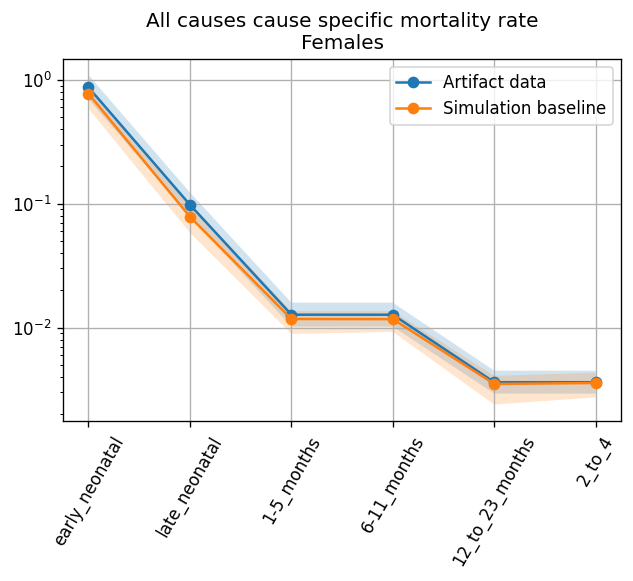

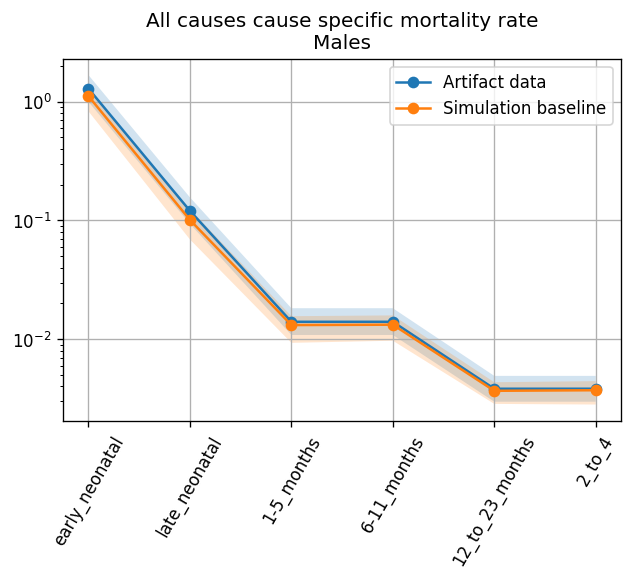

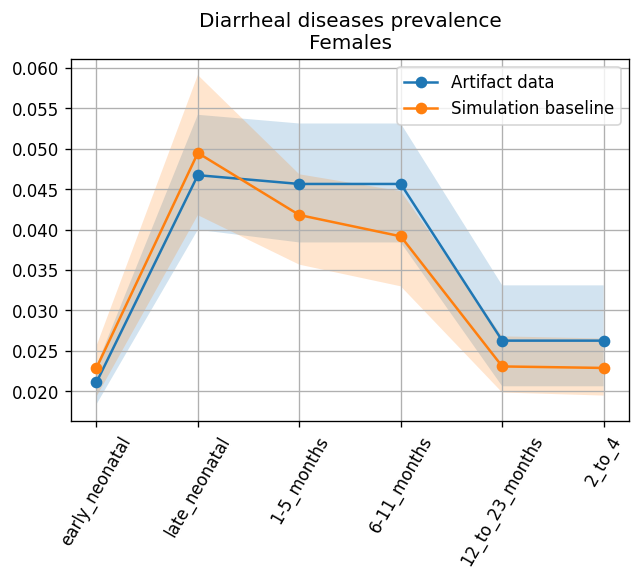

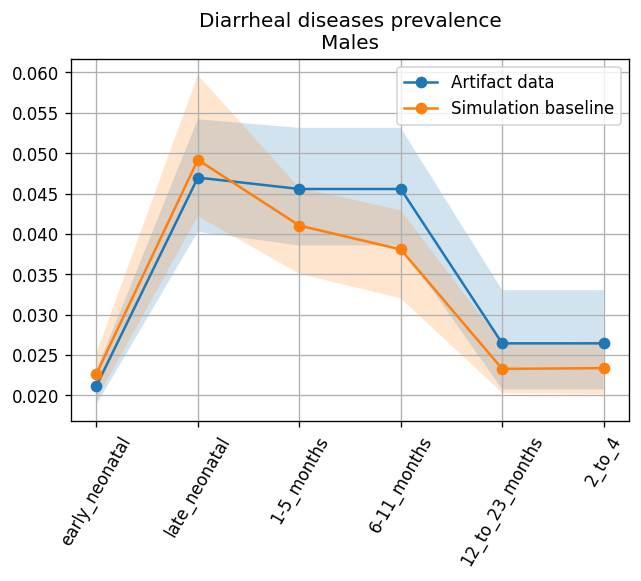

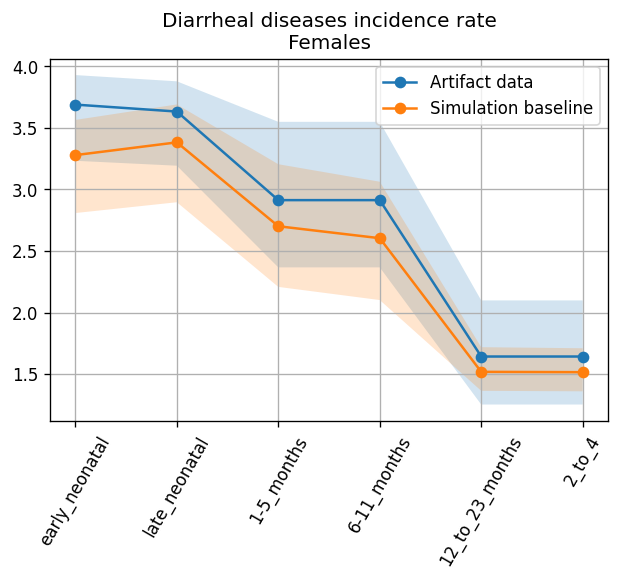

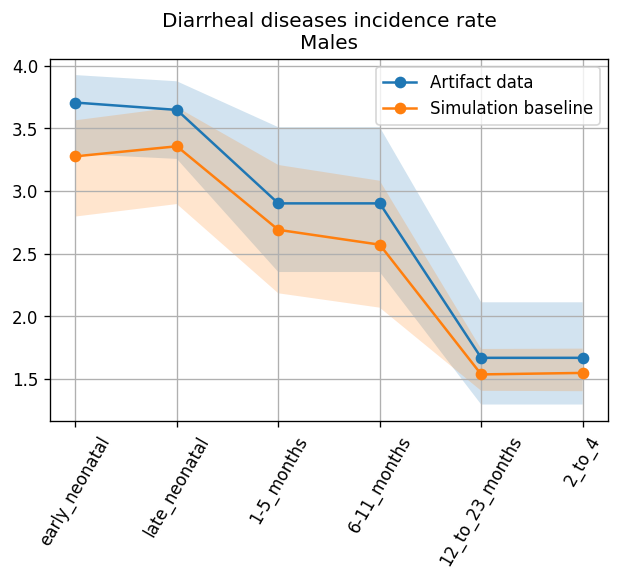

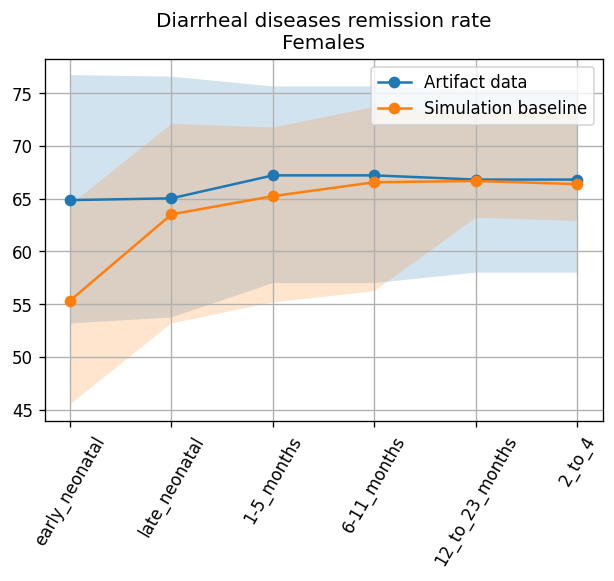

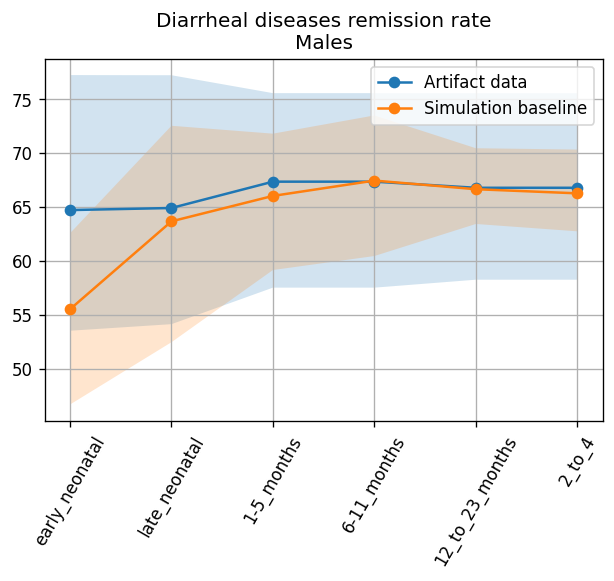

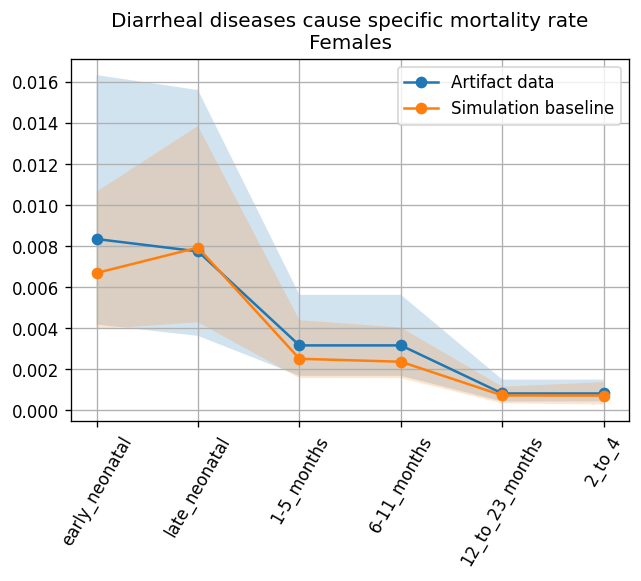

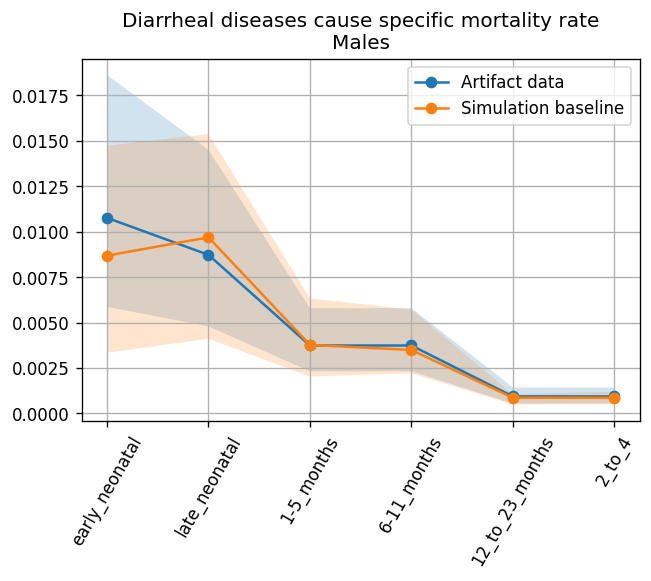

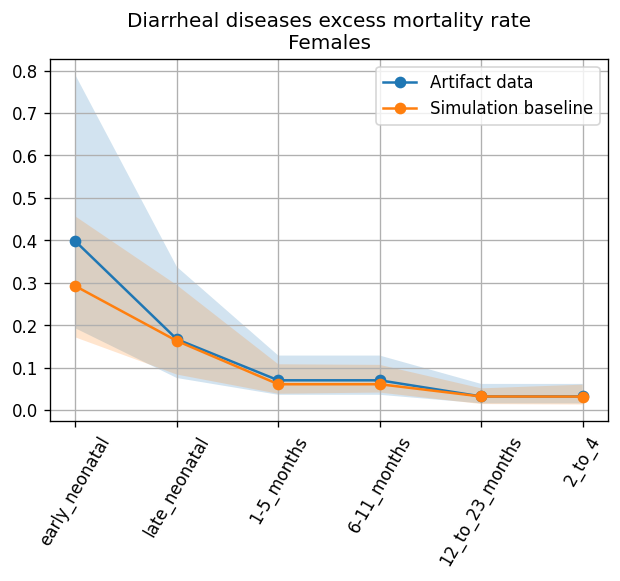

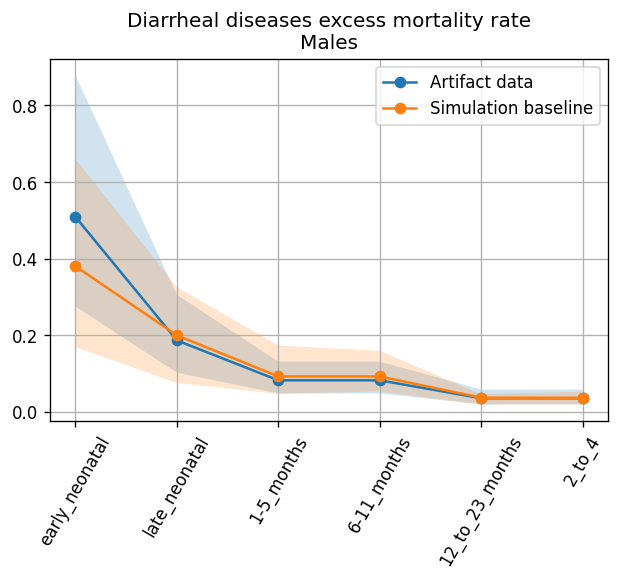

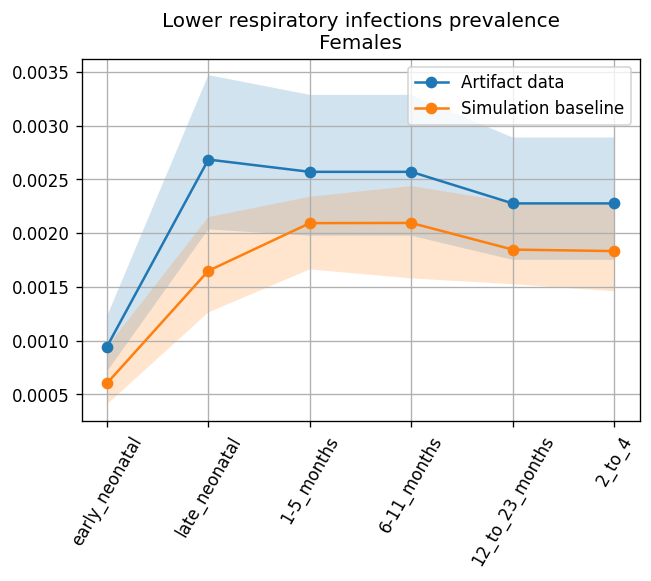

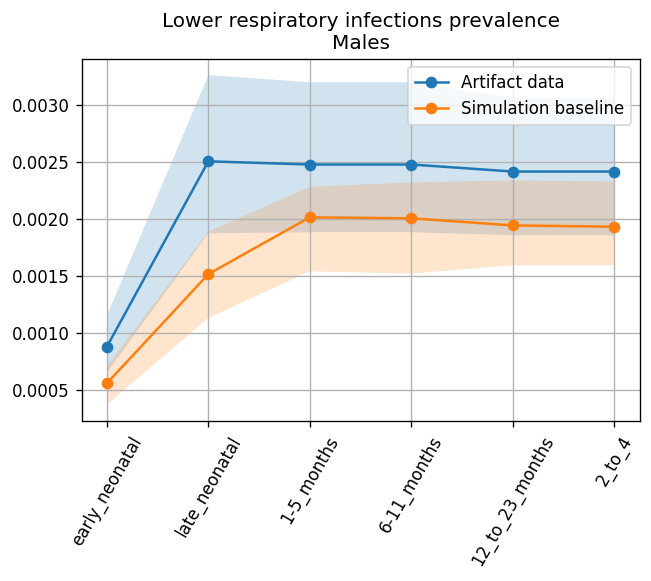

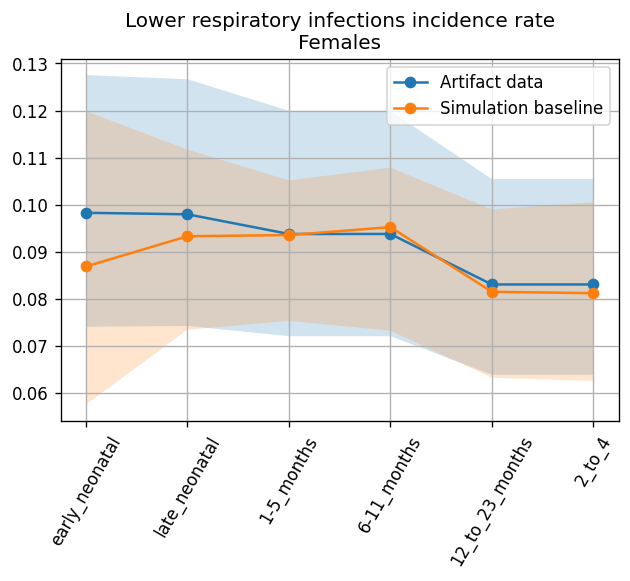

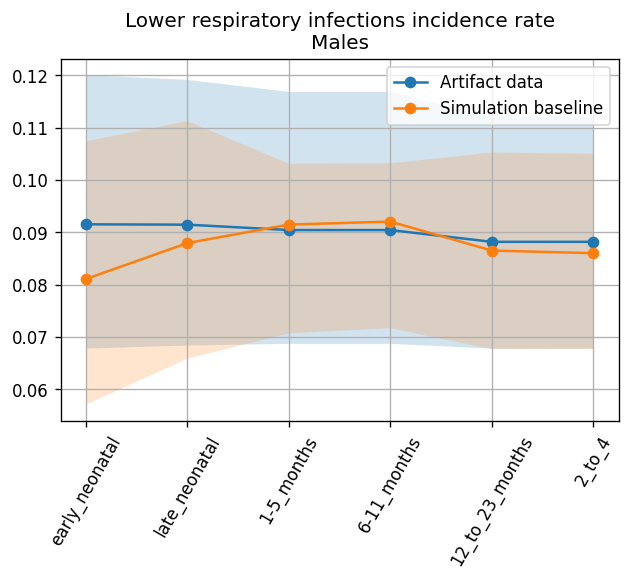

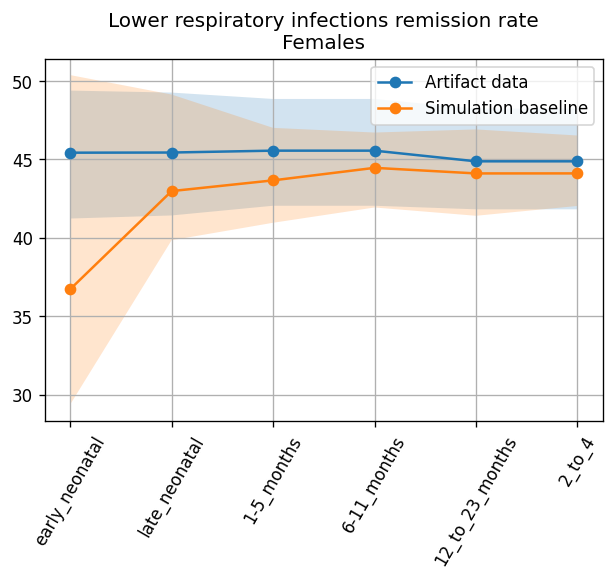

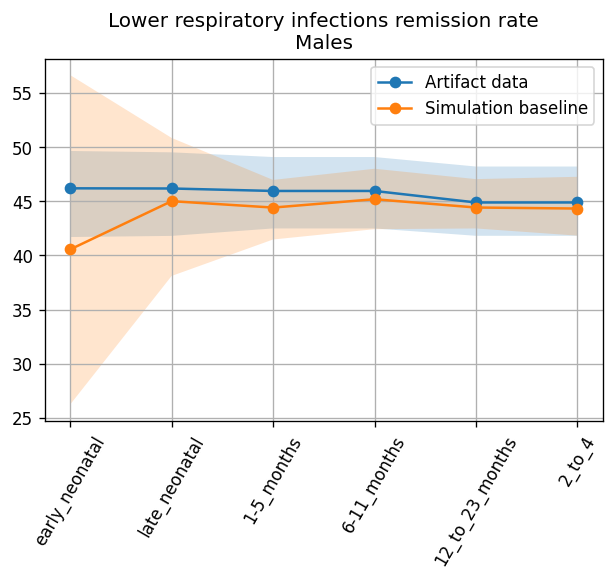

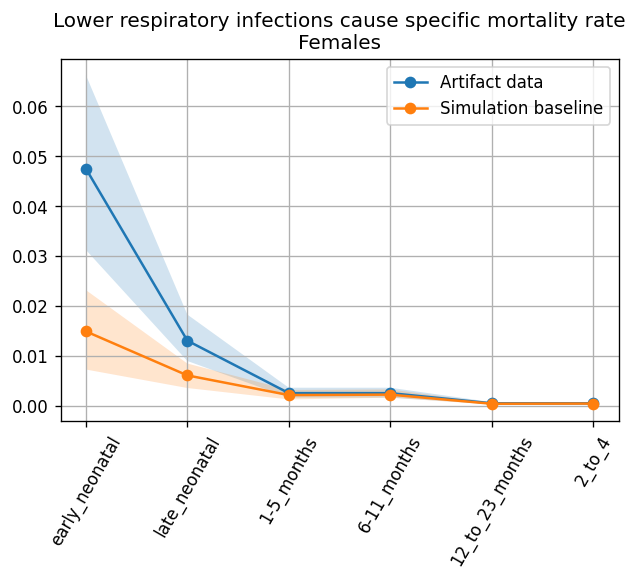

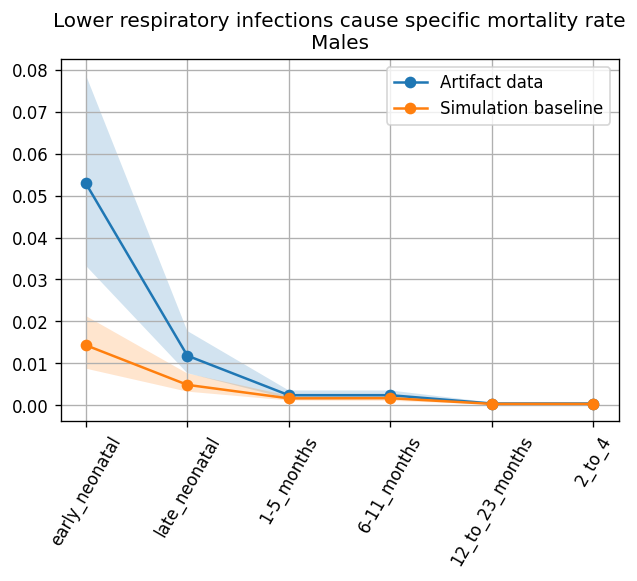

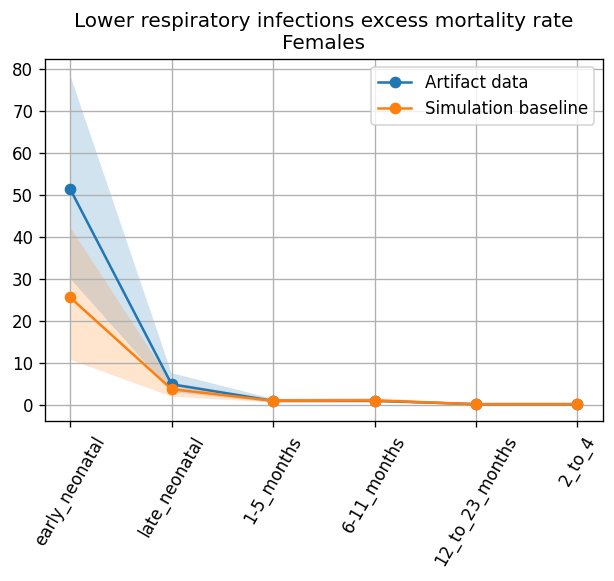

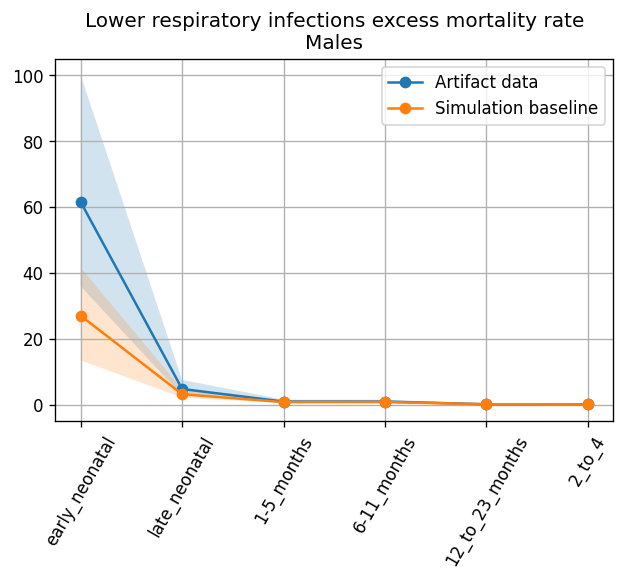

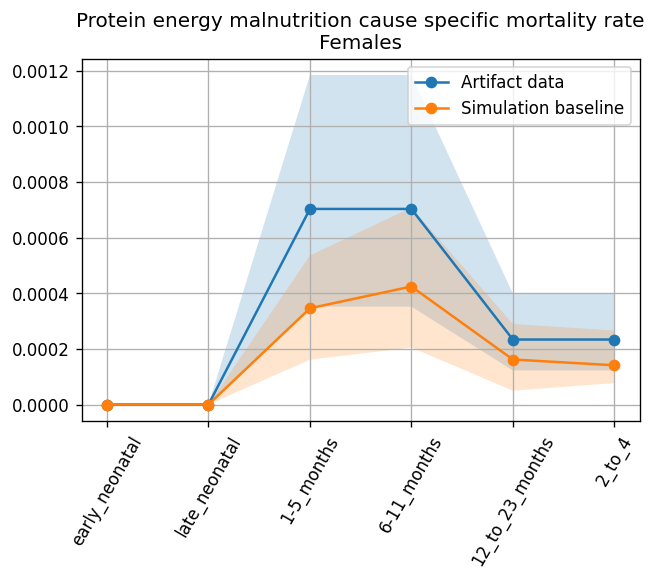

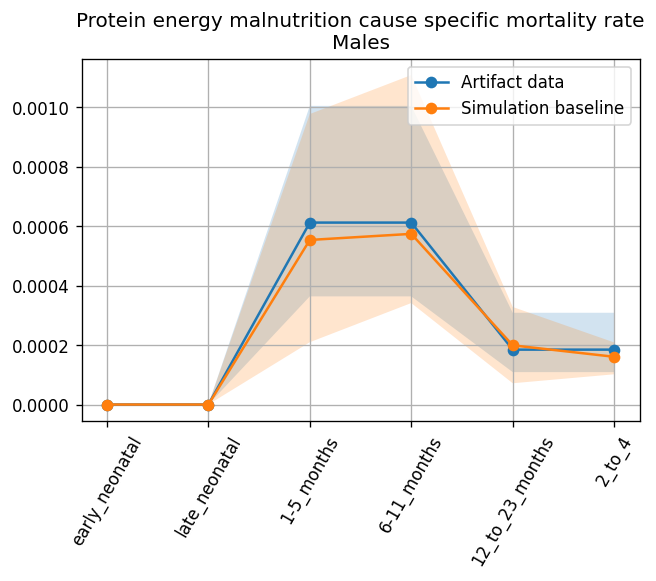

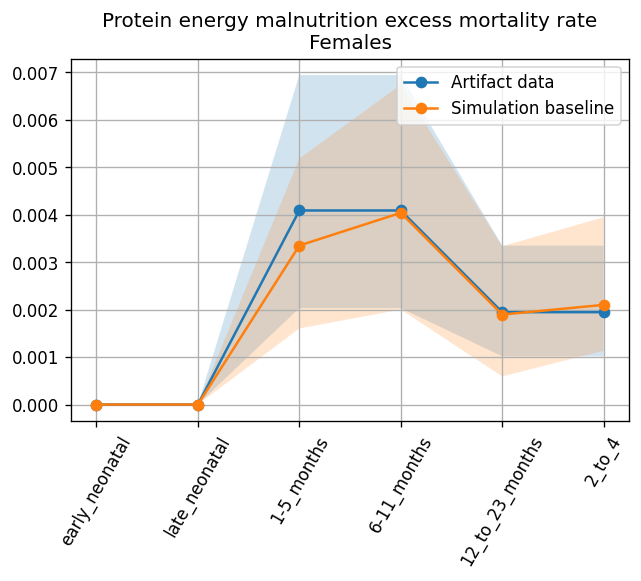

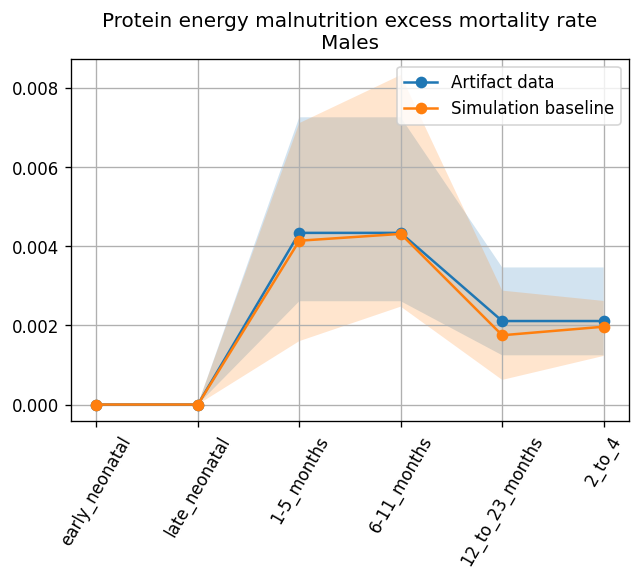

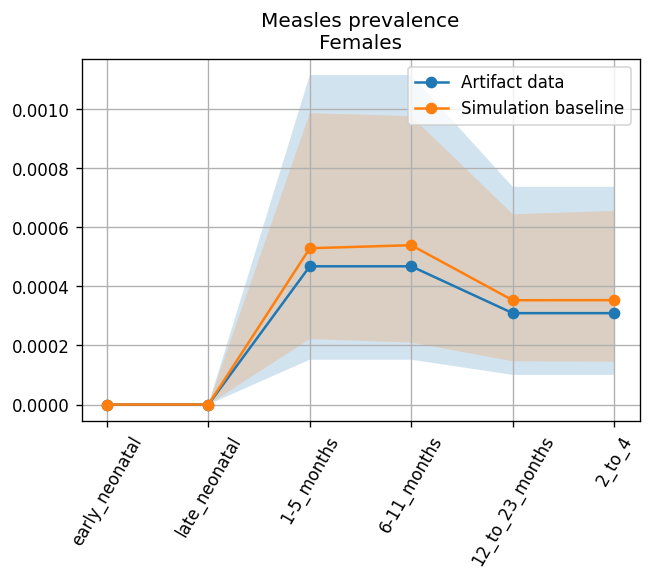

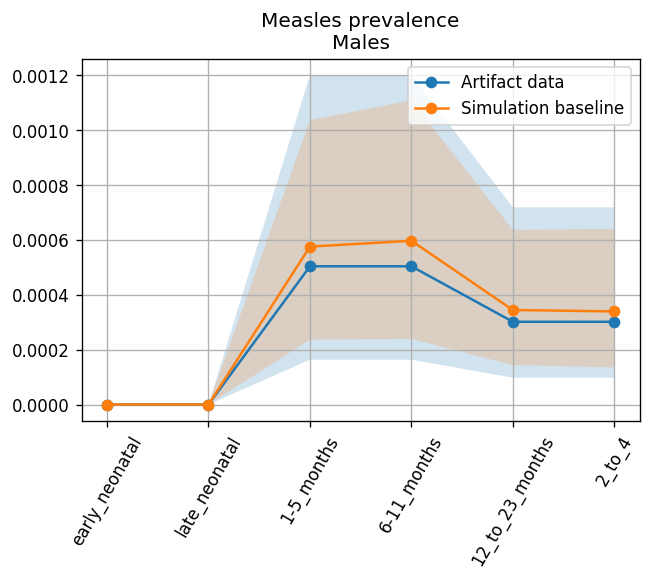

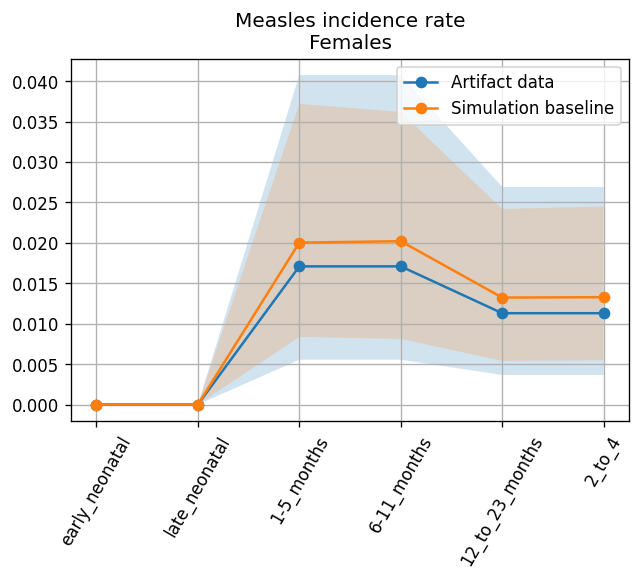

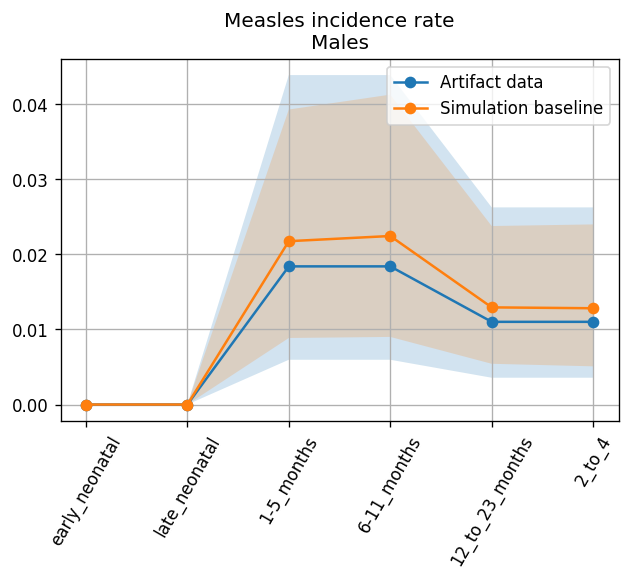

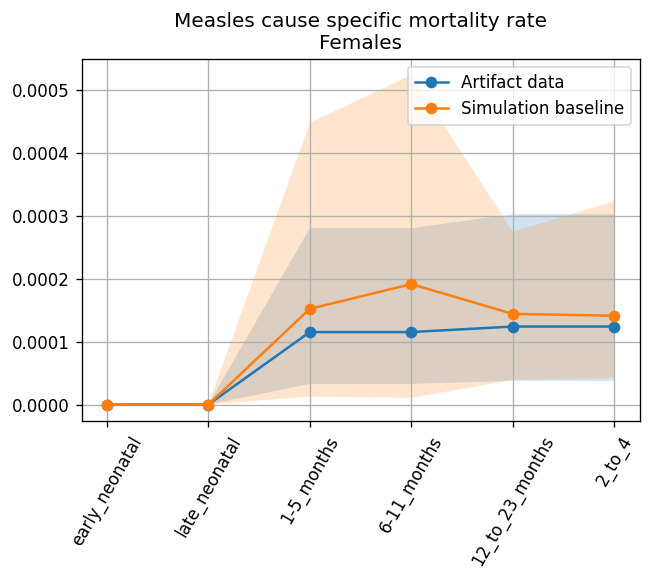

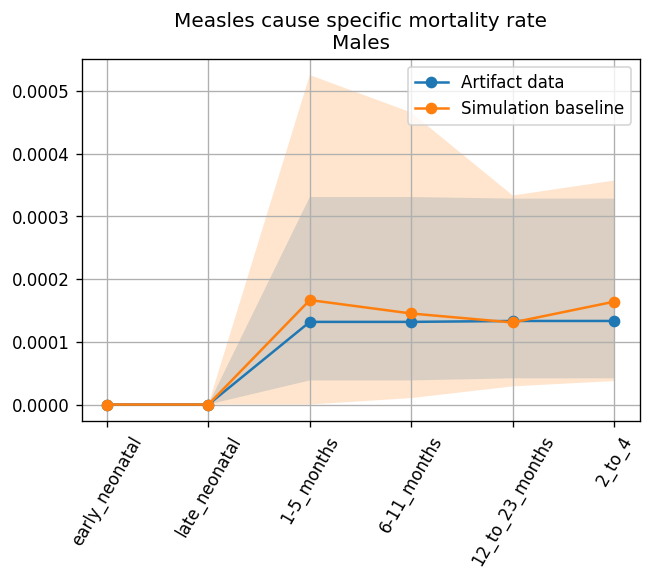

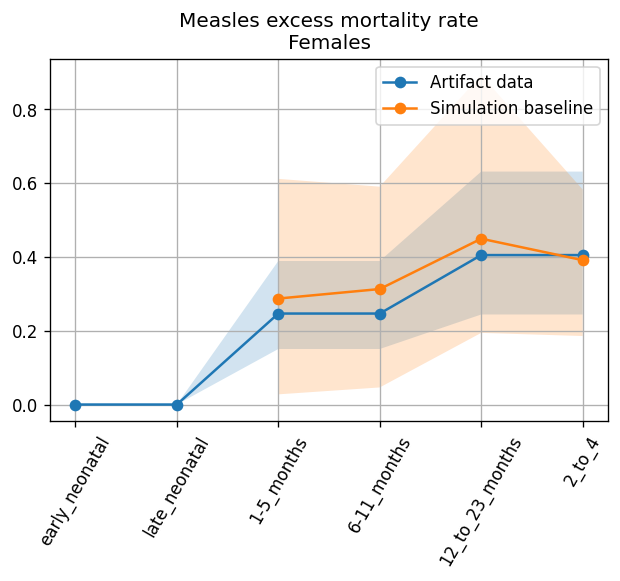

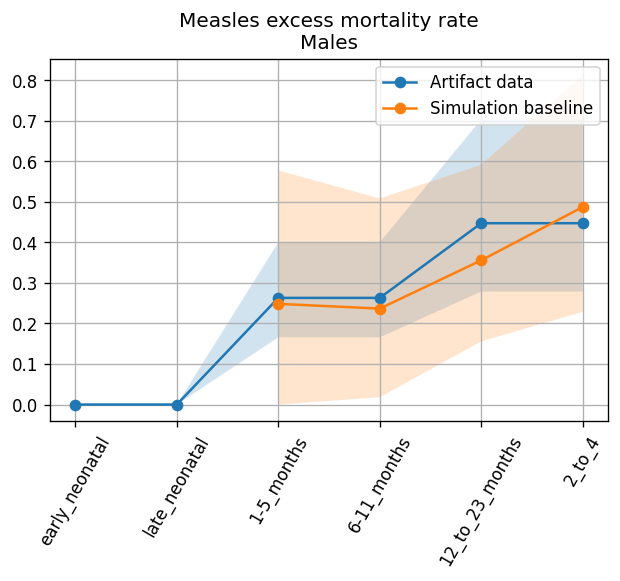

In [42]:
with PdfPages(f'plots/{figname}_cause_verification.pdf') as pdf:
    causes=['all_causes','diarrheal_diseases','lower_respiratory_infections','protein_energy_malnutrition','measles']
    measures=['prevalence','incidence_rate','remission_rate',
                   'cause_specific_mortality_rate','excess_mortality_rate']
    for cause in causes:
        for measure in measures:
            for sex in ['female','male']:
                try:
                    plot_cause_data(measure, cause, sex)
                    pdf.savefig(bbox_inches='tight')
                except:
                    pass